In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
from chart_studio import plotly
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
from scipy.sparse.linalg import svds


C:\Users\ASUS\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
rating=pd.read_csv('ratings.csv')
movie=pd.read_csv('movies.csv')

# Exploratory data analysis

In [3]:
rating

userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]

In [4]:
len(rating)

105339

In [5]:
movie

movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
10324                    Animation|Children|Comedy  
10325                                       Comedy  
10326                                       Comedy  
10327                                        Drama  
10328                           (no genres listed)  

[10329 rows x 3 columns]

In [6]:
len(movie)

10329

In [7]:
movie_data= movie.merge(rating,on='movieId')

# Genre wise Top 10 movies

In [8]:
movie_data

movieId                                title  \
0             1                     Toy Story (1995)   
1             1                     Toy Story (1995)   
2             1                     Toy Story (1995)   
3             1                     Toy Story (1995)   
4             1                     Toy Story (1995)   
...         ...                                  ...   
105334   148238       A Very Murray Christmas (2015)   
105335   148626                 The Big Short (2015)   
105336   148626                 The Big Short (2015)   
105337   148626                 The Big Short (2015)   
105338   149532  Marco Polo: One Hundred Eyes (2015)   

                                             genres  userId  rating  \
0       Adventure|Animation|Children|Comedy|Fantasy       2     5.0   
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
2       Adventure|Animation|Children|Comedy|Fantasy       8     5.0   
3       Adventure|Animation|Children|Comedy|Fantasy      11     4.0   
4       Adventure|Animation|Children|Comedy|Fantasy      14     4.0   
...                                             ...     ...     ...   
105334                                       Comedy     475     3.0   
105335                                        Drama     458     4.0   
105336                                        Drama     576     4.5   
105337                                        Drama     668     4.5   
105338                           (no genres listed)     475     4.0   

         timestamp  
0        859046895  
1       1303501039  
2        858610933  
3        850815810  
4        851766286  
...            ...  
105334  1451213043  
105335  1452014749  
105336  1451687664  
105337  1451148148  
105338  1451223429  

[105339 rows x 6 columns]

In [9]:
genres = movie['genres']
genres

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
10324                      Animation|Children|Comedy
10325                                         Comedy
10326                                         Comedy
10327                                          Drama
10328                             (no genres listed)
Name: genres, Length: 10329, dtype: object

In [10]:
genre_list = ""
for index,row in movie.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Documentary',
 'Drama',
 'Western',
 'Musical',
 'Sci-Fi',
 'Crime',
 'IMAX',
 'Animation',
 'Film-Noir',
 'Comedy',
 'War',
 'Mystery',
 'Action',
 'Children',
 'Adventure',
 '(no genres listed)',
 'Romance',
 'Thriller',
 'Horror',
 'Fantasy']

In [11]:
movies_with_genres = movie.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [12]:
movies_with_genres

movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  Documentary  Drama  \
0      Adventure|Animation|Children|Comedy|Fantasy            0      0   
1                       Adventure|Children|Fantasy            0      0   
2                                   Comedy|Romance            0      0   
3                             Comedy|Drama|Romance            0      1   
4                                           Comedy            0      0   
...                                            ...          ...    ...   
10324                    Animation|Children|Comedy            0      0   
10325                                       Comedy            0      0   
10326                                       Comedy            0      0   
10327                                        Drama            0      1   
10328                           (no genres listed)            0      0   

       Western  Musical  Sci-Fi  Crime  IMAX  ...  War  Mystery  Action  \
0            0        0       0      0     0  ...    0        0       0   
1            0        0       0      0     0  ...    0        0       0   
2            0        0       0      0     0  ...    0        0       0   
3            0        0       0      0     0  ...    0        0       0   
4            0        0       0      0     0  ...    0        0       0   
...        ...      ...     ...    ...   ...  ...  ...      ...     ...   
10324        0        0       0      0     0  ...    0        0       0   
10325        0        0       0      0     0  ...    0        0       0   
10326        0        0       0      0     0  ...    0        0       0   
10327        0        0       0      0     0  ...    0        0       0   
10328        0        0       0      0     0  ...    0        0       0   

       Children  Adventure  (no genres listed)  Romance  Thriller  Horror  \
0             1          1                   0        0         0       0   
1             1          1                   0        0         0       0   
2             0          0                   0        1         0       0   
3             0          0                   0        1         0       0   
4             0          0                   0        0         0       0   
...         ...        ...                 ...      ...       ...     ...   
10324         1          0                   0        0         0       0   
10325         0          0                   0        0         0       0   
10326         0          0                   0        0         0       0   
10327         0          0                   0        0         0       0   
10328         0          0                   1        0         0       0   

       Fantasy  
0            1  
1            1  
2            0  
3            0  
4            0  
...        ...  
10324        0  
10325        0  
10326        0  
10327        0  
10328        0  

[10329 rows x 23 columns]

In [13]:
avg_movie_rating = pd.DataFrame(rating.groupby('movieId')['rating'].agg(['mean','count']))
avg_movie_rating['movieId']= avg_movie_rating.index
avg_rating_all=rating['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
#create a function for weighted rating score based off count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
movie_score=movie_score.reset_index(drop=True)

#join movie details to movie ratings
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [14]:
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score']][:top_n])

In [15]:
action=best_movies_by_genre('Action',10)
action

title  count      mean  \
518                                 Matrix, The (1999)    261  4.264368   
252  Star Wars: Episode V - The Empire Strikes Back...    228  4.228070   
254  Raiders of the Lost Ark (Indiana Jones and the...    224  4.212054   
71           Star Wars: Episode IV - A New Hope (1977)    273  4.188645   
572                                  Fight Club (1999)    207  4.188406   
253                         Princess Bride, The (1987)    171  4.163743   
577           Princess Mononoke (Mononoke-hime) (1997)     52  4.384615   
141                                Blade Runner (1982)    156  4.169872   
199                          North by Northwest (1959)     73  4.273973   
256                                      Aliens (1986)    157  4.146497   

     weighted_score  
518        4.187304  
252        4.145370  
254        4.129943  
71         4.122130  
572        4.103399  
253        4.067192  
577        4.067140  
141        4.064546  
199        4.053452  
256        4.045484

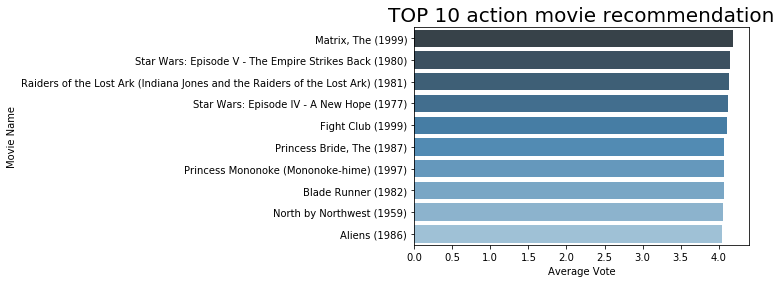

In [16]:

ax = sns.barplot(y="title", x="weighted_score", data=action,
                 palette="Blues_d")
ax.set_title('TOP 10 action movie recommendation',fontsize=20)
ax.set_xlabel('Average Vote')
ax.set_ylabel('Movie Name')
plt.savefig('action.jpeg')

In [17]:
children=best_movies_by_genre('Children',10)

Text(0, 0.5, 'Movie Name')

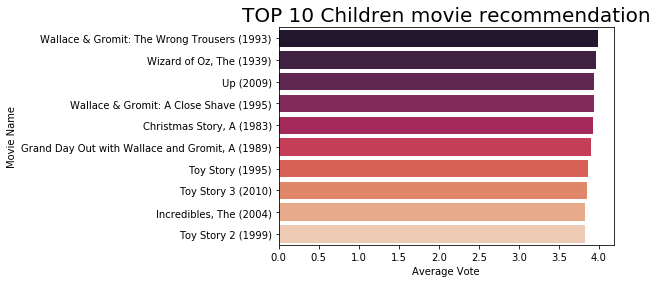

In [18]:

ax = sns.barplot(y="title", x="weighted_score", data=children,
                 palette="rocket")
ax.set_title('TOP 10 Children movie recommendation',fontsize=20)
ax.set_xlabel('Average Vote')
ax.set_ylabel('Movie Name')

In [19]:
thriller=best_movies_by_genre('Thriller',10)

Text(0, 0.5, 'Movie Name')

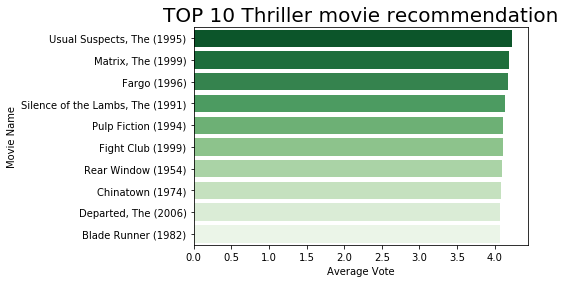

In [20]:

ax = sns.barplot(y="title", x="weighted_score", data=thriller,
                 palette="Greens_r")
ax.set_title('TOP 10 Thriller movie recommendation',fontsize=20)
ax.set_xlabel('Average Vote')
ax.set_ylabel('Movie Name')

# Are there certain words that figure more often in Movie Titles?

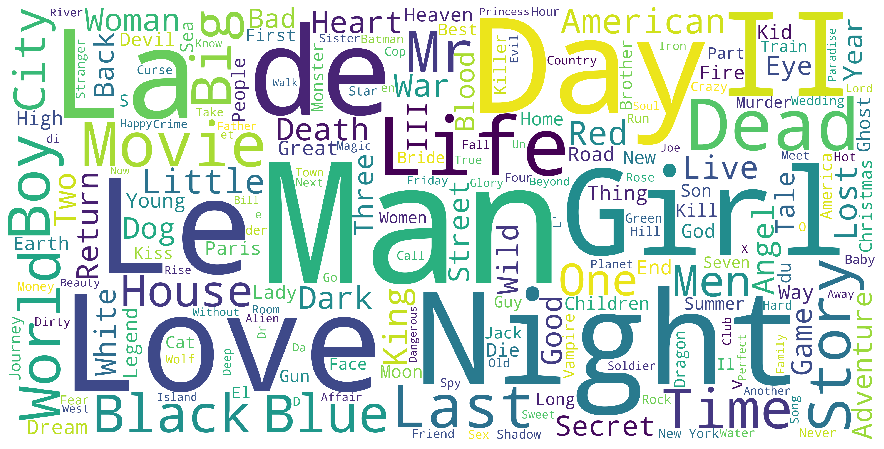

<Figure size 432x288 with 0 Axes>

In [21]:

title_corpus = ' '.join(movie['title'])
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
plt.savefig('action.jpeg')

## Love , Life, Night Day and Man are the most commonly occuring words. 

# Ratings per user

Min number of user ratings:  20
Max number of user ratings:  5678


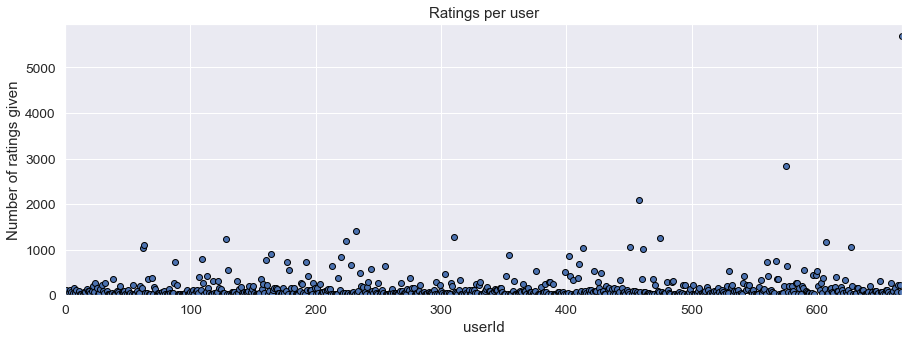

In [22]:
df_1 = rating[['userId', 'movieId']].groupby('userId').count()
df_1.columns=['num_ratings']
print("Min number of user ratings: ",min(df_1.num_ratings))
print("Max number of user ratings: ",max(df_1.num_ratings))
plt.figure(figsize=(15,5))
plt.scatter(df_1.index, df_1.num_ratings, edgecolor='black')
plt.xlim(0,len(df_1.index))
plt.ylim(0,)
plt.title('Ratings per user')
plt.xlabel('userId')
plt.ylabel('Number of ratings given')
plt.show()

# Ratings per movie

Mean number of movies' ratings:  10.202324455205812


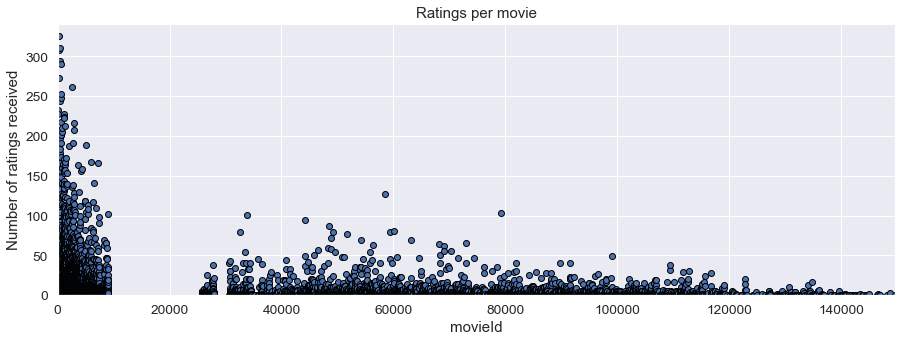

In [23]:
df_2 = rating[['userId', 'movieId']].groupby('movieId').count()
df_2.columns=['num_ratings']
print("Mean number of movies' ratings: ",df_2.num_ratings.mean())
plt.figure(figsize=(15,5))
plt.scatter(df_2.index, df_2.num_ratings, edgecolor='black')
plt.xlim(0,df_2.index.max())
plt.ylim(0,)
plt.title('Ratings per movie')
plt.xlabel('movieId')
plt.ylabel('Number of ratings received')
plt.show()

# Collaborative Recommendation System using K-Nearest Neighbors

In [24]:
movies_users=rating.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)

In [25]:
movies_users

userId   1    2    3    4    5    6    7    8    9    10   ...  659  660  661  \
movieId                                                    ...                  
1        0.0  5.0  0.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  ...  0.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  2.0  0.0  0.0  0.0  0.0  0.0  4.0  3.0  0.0  ...  0.0  0.0  3.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  3.0  3.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...  0.0  0.0  3.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
146684   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
146878   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
148238   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
148626   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
149532   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   662  663  664  665  666  667  668  
movieId                                     
1        5.0  3.0  0.0  0.0  0.0  0.0  3.0  
2        5.0  0.0  0.0  0.0  0.0  0.0  3.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  2.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  2.5  
...      ...  ...  ...  ...  ...  ...  ...  
146684   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
146878   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
148238   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
148626   0.0  0.0  0.0  0.0  0.0  0.0  4.5  
149532   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10325 rows x 668 columns]

In [26]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(mat_movies_users)
def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, movie['title'])[2]
    print('Movie Selected: ',movie['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(movie['title'][i].where(i!=idx))
    
recommender('Star Wars: Episode IV - A New Hope (1977)', mat_movies_users, model_knn,20)

Movie Selected:  Star Wars: Episode IV - A New Hope (1977) Index:  230
Searching for recommendations.....
230                                                   NaN
971     Star Wars: Episode VI - Return of the Jedi (1983)
958     Star Wars: Episode V - The Empire Strikes Back...
960     Raiders of the Lost Ark (Indiana Jones and the...
1050            Indiana Jones and the Last Crusade (1989)
999                                Terminator, The (1984)
0                                        Toy Story (1995)
975                                          Alien (1979)
2056                                   Matrix, The (1999)
1029                            Back to the Future (1985)
962                                         Aliens (1986)
646                  Independence Day (a.k.a. ID4) (1996)
1260                     Men in Black (a.k.a. MIB) (1997)
843                                       Die Hard (1988)
922                Monty Python and the Holy Grail (1975)
959                     

In [27]:
reader = Reader()
ratings = rating.drop('timestamp',axis=1)
data = Dataset.load_from_df(ratings, reader)
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
knn = KNNBasic(sim_options=sim_options)
cross_validate(knn, data, measures=['RMSE', 'mae'], cv = 5,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9712  0.9743  0.9785  0.9791  0.9739  0.9754  0.0030  
MAE (testset)     0.7561  0.7588  0.7591  0.7618  0.7549  0.7581  0.0024  
Fit time          31.07   29.30   30.21   30.84   28.83   30.05   0.86    
Test time         10.74   10.08   10.66   10.26   10.72   10.49   0.27    


{'test_rmse': array([0.97119093, 0.97428996, 0.97853986, 0.97907695, 0.97389924]),
 'test_mae': array([0.75613717, 0.75881042, 0.75909208, 0.76176805, 0.75486948]),
 'fit_time': (31.065303802490234,
  29.296696424484253,
  30.214193105697632,
  30.835700511932373,
  28.826205492019653),
 'test_time': (10.739954233169556,
  10.084986925125122,
  10.659494161605835,
  10.26052737236023,
  10.721415758132935)}

# Recommender Systems with Correlation

In [28]:
ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings.head()

rating
title                                          
'71 (2014)                                3.500
'Hellboy': The Seeds of Creation (2004)   3.000
'Round Midnight (1986)                    2.500
'Til There Was You (1997)                 4.000
'burbs, The (1989)                        3.125

In [29]:
ratings['num of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings.head()

rating  num of ratings
title                                                          
'71 (2014)                                3.500               1
'Hellboy': The Seeds of Creation (2004)   3.000               1
'Round Midnight (1986)                    2.500               1
'Til There Was You (1997)                 4.000               3
'burbs, The (1989)                        3.125              20

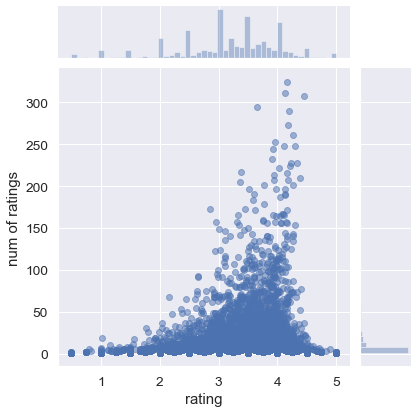

In [30]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [31]:
moviemat = movie_data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
1                          NaN                        NaN                 NaN   
2                          NaN                        NaN                 NaN   
3                          NaN                        NaN                 NaN   
4                          NaN                        NaN                 NaN   
5                          NaN                        NaN                 NaN   

title   'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                      
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
5                                  NaN                            NaN   

title   10 (1979)  ...  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId             ...                                                         
1             NaN  ...           NaN            NaN                      NaN   
2             NaN  ...           NaN            NaN                      NaN   
3             NaN  ...           NaN            NaN                      NaN   
4             NaN  ...           NaN            NaN                      NaN   
5             NaN  ...           NaN            NaN                      NaN   

title   a/k/a Tommy Chong (2005)  eXistenZ (1999)  \
userId                                              
1                            NaN              NaN   
2                            NaN              NaN   
3                            NaN              NaN   
4                            NaN              NaN   
5                            NaN              NaN   

title   loudQUIETloud: A Film About the Pixies (2006)  xXx (2002)  \
userId                                                              
1                                                 NaN         NaN   
2                                                 NaN         NaN   
3                                                 NaN         NaN   
4                                                 NaN         NaN   
5                                                 NaN         NaN   

title   xXx: State of the Union (2005)  ¡Three Amigos! (1986)  \
userId                                                          
1                                  NaN                    NaN   
2                                  NaN                    NaN   
3                                  NaN                    NaN   
4                                  NaN                    NaN   
5                                  NaN                    NaN   

title   À nous la liberté (Freedom for Us) (1931)  
userId                                             
1                                             NaN  
2                    

In [32]:
user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']


In [33]:
similar_to = moviemat.corrwith(user_ratings)
corr = pd.DataFrame(similar_to,columns=['Correlation'])
corr.dropna(inplace=True)
corr = corr.join(ratings['num of ratings'])
corr[corr['num of ratings']>100].sort_values('Correlation',ascending=False).head()

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation  \
title                                                             
Star Wars: Episode IV - A New Hope (1977)              1.000000   
Star Wars: Episode V - The Empire Strikes Back ...     0.725627   
Star Wars: Episode VI - Return of the Jedi (1983)      0.657868   
Green Mile, The (1999)                                 0.575728   
Austin Powers: International Man of Mystery (1997)     0.541216   

                                                    num of ratings  
title                                                               
Star Wars: Episode IV - A New Hope (1977)                      273  
Star Wars: Episode V - The Empire Strikes Back ...             228  
Star Wars: Episode VI - Return of the Jedi (1983)              222  
Green Mile, The (1999)                                         101  
Austin Powers: International Man of Mystery (1997)             101

# Model based movie recommendation using SVD matrix factorization

In [34]:
Ratings = rating.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  144482  144656  144976  146344  146656  146684  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  146878  148238  148626  149532  
userId                                   
1           0.0     0.0     0.0     0.0  
2           0.0     0.0     0.0     0.0  
3           0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     0.0  

[5 rows x 10325 columns]

[[]]

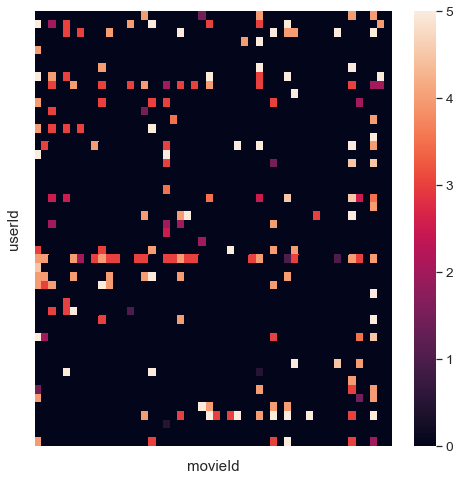

In [35]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(Ratings.iloc[:50,:50])
ax.set(xticklabels=[])
ax.set(yticklabels=[])

In [36]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)
U, sigma, Vt = svds(Ratings_demeaned, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)

[Text(46.5, 0.5, 'userId')]

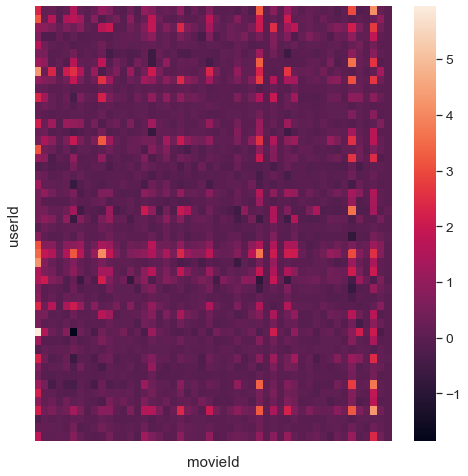

In [37]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(preds.iloc[:50,:50])
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(ylabel="userId")

In [38]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    #print(sorted_user_predictions)
    #p=pd.DataFrame(sorted_user_predictions).reset_index()
    #print(p)
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [39]:
already_rated, predictions = recommend_movies(preds, 120, movie, rating, 20)

User 120 has already rated 46 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [40]:
already_rated

userId  movieId  rating  timestamp  \
23     120     1282     5.0  960332224   
31     120     1947     5.0  960332224   
20     120     1197     5.0  960332076   
21     120     1199     5.0  960331849   
25     120     1394     5.0  960332097   
27     120     1537     5.0  960332121   
28     120     1542     5.0  960331992   
30     120     1914     5.0  960331992   
32     120     1951     5.0  960332253   
18     120     1035     5.0  960332224   
33     120     1968     5.0  960331849   
35     120     2096     5.0  960332253   
36     120     2324     5.0  960332013   
37     120     2396     5.0  960332014   
39     120     2804     5.0  960332076   
41     120     2858     5.0  960332029   
19     120     1066     5.0  960332224   
45     120     3675     5.0  960332253   
8      120      594     5.0  960332195   
16     120     1028     5.0  960332195   
15     120      945     5.0  960332195   
2      120       73     5.0  960332195   
13     120      919     5.0  960332167   
4      120      364     5.0  960332253   
11     120      910     5.0  960332041   
9      120      595     5.0  960332195   
43     120     3114     4.0  960332076   
42     120     3083     4.0  960332097   
40     120     2857     4.0  960332195   
3      120      242     4.0  960332167   
34     120     2087     4.0  960332224   
7      120      588     4.0  960332224   
17     120     1032     4.0  960332224   
29     120     1885     4.0  960332134   
12     120      918     4.0  960332195   
26     120     1500     4.0  960332121   
24     120     1293     4.0  960331849   
1      120       34     4.0  960332057   
22     120     1235     4.0  960332097   
14     120      920     4.0  960331849   
0      120        1     4.0  960332121   
10     120      661     3.0  960332253   
5      120      551     3.0  960332253   
44     120     3421     3.0  960332014   
6      120      552     2.0  960331849   
38     120     2649     2.0  960331849   

                                               title  \
23                                   Fantasia (1940)   
31                            West Side Story (1961)   
20                        Princess Bride, The (1987)   
21                                     Brazil (1985)   
25                            Raising Arizona (1987)   
27          Shall We Dance? (Shall We Dansu?) (1996)   
28                                Brassed Off (1996)   
30                              Smoke Signals (1998)   
32                                    Oliver! (1968)   
18                        Sound of Music, The (1965)   
33                        Breakfast Club, The (1985)   
35                            Sleeping Beauty (1959)   
36        Life Is Beautiful (La Vita è bella) (1997)   
37                        Shakespeare in Love (1998)   
39                         Christmas Story, A (1983)   
41                            American Beauty (1999)   
19                             Shall We Dance (1937)   
45                            White Christmas (1954)   
8             Snow White and the Seven Dwarfs (1937)   
16                               Mary Poppins (1964)   
15                                    Top Hat (1935)   
2                             Misérables, Les (1995)   
13                          Wizard of Oz, The (1939)   
4                              Lion King, The (1994)   
11                           Some Like It Hot (1959)   
9                        Beauty and the Beast (1991)   
43                                Toy Story 2 (1999)   
42  All About My Mother (Todo sobre mi madre) (1999)   
40                           Yellow Submarine (1968)   
3                      Farinelli: il castrato (1994)   
34                                  Peter Pan (1953)   
7                                     Aladdin (1992)   
17                        Alice in Wonderland (1951)   
29                       Opposite of Sex, The (1998)   
12                       Meet Me in St. Louis (1944)   
26           

In [41]:
predictions

movieId                                              title  \
852      1073         Willy Wonka & the Chocolate Factory (1971)   
1606     2081                         Little Mermaid, The (1989)   
723       914                                My Fair Lady (1964)   
814      1022                                  Cinderella (1950)   
1603     2078                            Jungle Book, The (1967)   
1605     2080                          Lady and the Tramp (1955)   
819      1029                                       Dumbo (1941)   
874      1097                  E.T. the Extra-Terrestrial (1982)   
1610     2085  101 Dalmatians (One Hundred and One Dalmatians...   
518       596                                   Pinocchio (1940)   
1546     2018                                       Bambi (1942)   
43         48                                  Pocahontas (1995)   
1014     1278                          Young Frankenstein (1974)   
902      1136             Monty Python and the Holy Grail (1975)   
905      1148        Wallace & Gromit: The Wrong Trousers (1993)   
1829     2355                               Bug's Life, A (1998)   
2170     2762                            Sixth Sense, The (1999)   
421       480                               Jurassic Park (1993)   
2346     2987                    Who Framed Roger Rabbit? (1988)   
226       260          Star Wars: Episode IV - A New Hope (1977)   

                                                 genres  
852                     Children|Comedy|Fantasy|Musical  
1606          Animation|Children|Comedy|Musical|Romance  
723                        Comedy|Drama|Musical|Romance  
814          Animation|Children|Fantasy|Musical|Romance  
1603                  Animation|Children|Comedy|Musical  
1605                  Animation|Children|Comedy|Romance  
819                    Animation|Children|Drama|Musical  
874                               Children|Drama|Sci-Fi  
1610                       Adventure|Animation|Children  
518                  Animation|Children|Fantasy|Musical  
1546                           Animation|Children|Drama  
43             Animation|Children|Drama|Musical|Romance  
1014                                     Comedy|Fantasy  
902                            Adventure|Comedy|Fantasy  
905                     Animation|Children|Comedy|Crime  
1829                Adventure|Animation|Children|Comedy  
2170                               Drama|Horror|Mystery  
421                    Action|Adventure|Sci-Fi|Thriller  
2346  Adventure|Animation|Children|Comedy|Crime|Fant...  
226                             Action|Adventure|Sci-Fi

## SVD model Evaluation

In [45]:

reader = Reader()
# Load ratings dataset with Dataset library
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)
algo=SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8725  0.8646  0.8705  0.8639  0.8718  0.8687  0.0037  
MAE (testset)     0.6729  0.6682  0.6689  0.6662  0.6714  0.6695  0.0024  
Fit time          4.79    4.77    5.00    5.02    4.97    4.91    0.10    
Test time         0.13    0.13    0.25    0.20    0.13    0.17    0.05    


{'test_rmse': array([0.87246224, 0.86459694, 0.87050504, 0.86391835, 0.87179193]),
 'test_mae': array([0.67289069, 0.66824729, 0.66888493, 0.66619296, 0.67142789]),
 'fit_time': (4.790752649307251,
  4.774211883544922,
  4.995620250701904,
  5.015393257141113,
  4.965730905532837),
 'test_time': (0.13359808921813965,
  0.131622314453125,
  0.2533242702484131,
  0.20245957374572754,
  0.12767457962036133)}